# Module 12 Challenge

## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
from bs4 import BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup 
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
executable_path = ChromeDriverManager().install()

In [3]:
browser = Browser('chrome')

### Visiting the website

### Scraping the table

In [5]:
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

browser.visit(url)

html = browser.html

In [6]:
soup = BeautifulSoup(html, 'html.parser')

In [61]:
# Extract all rows of data
mars_table = soup.find('table', class_= 'table')
mars_table

<table class="table">
<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.

### Storing Data

In [62]:
header = soup.find_all('th')
header

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

In [63]:
#Extract headers

header_list = []
for header_text in header:
    titles = header_text.text
    header_list.append(titles)

header_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [64]:
df = pd.DataFrame(columns = header_list)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [ ]:
# Create an empty list
# Loop through the scraped data to create a list of rows

for row in mars_table.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        lenghth=len(df)
        df.loc[lenghth]=row_data

In [65]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
       
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Preparing data for analysis

In [66]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [67]:
# Change data types for data analysis


df['id'] = df['id'].astype('int')
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int')
df['ls'] = df['ls'].astype('int')
df['month'] = df['month'].astype('int')
df['min_temp'] = df['min_temp'].astype('float')
df['pressure'] = df['pressure'].astype('float')


In [68]:
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Analyzing data

In [69]:
# 1. How many months are there on Mars?
max_months_on_mars = df['month'].max()
max_months_on_mars

12

In [70]:
# 2. How many Martian days' worth of data are there?
martian_days = df['sol'].unique()
len(martian_days)

1867

In [85]:
# 3. What is the average low temperature by month?
temp_df_groupby_month = df.groupby('month').mean()
avg_mintemp_df = temp_df_groupby_month['min_temp'].reset_index('month')
avg_mintemp_df     

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


Text(0, 0.5, 'Temp')

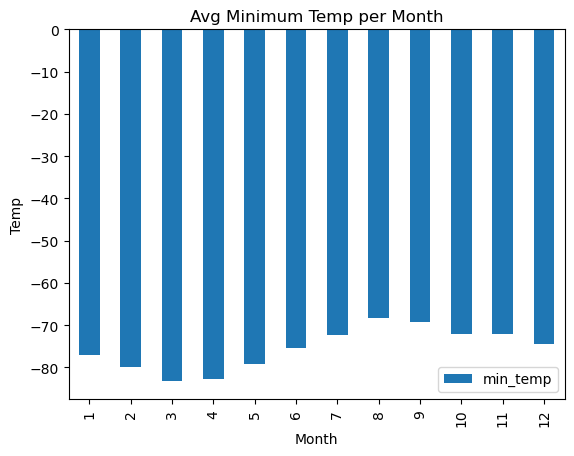

In [89]:
# Plot the average temperature by month

avg_mintemp_df.plot(x = 'month', y = 'min_temp', kind = 'bar')

plt.title("Avg Minimum Temp per Month")
plt.xlabel("Month")
plt.ylabel("Temp")

In [96]:
# Identify the coldest and hottest months in Curiosity's location

coldest_temp = avg_mintemp_df['min_temp'].min()
coldest_month = avg_mintemp_df.loc[avg_mintemp_df['min_temp'] == coldest_temp, 'month'].iloc[0]
coldest_month

3

In [98]:
hottest_temp = avg_mintemp_df['min_temp'].max()
hottest_month = avg_mintemp_df.loc[avg_mintemp_df['min_temp'] == hottest_temp, 'month'].iloc[0]
hottest_month

8

In [99]:
# 4. Average pressure by Martian month

pressure_df_groupby_month = df.groupby('month').mean()
avg_pressure_df = pressure_df_groupby_month['pressure'].reset_index('month')
avg_pressure_df

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


Text(0, 0.5, 'Pressur')

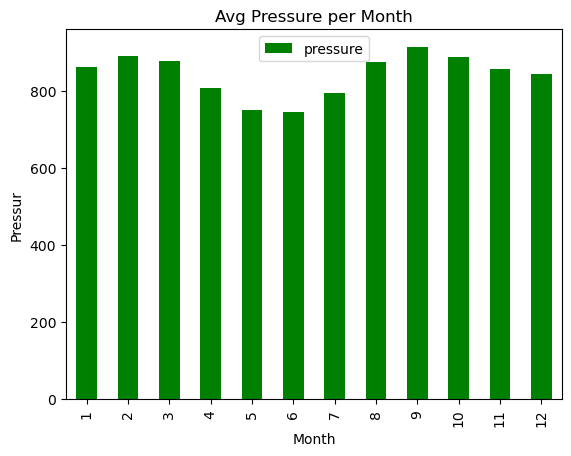

In [101]:
# Plot the average pressure by month

avg_pressure_df.plot(x = 'month', y = 'pressure', kind = 'bar', color = 'green')

plt.title("Avg Pressure per Month")
plt.xlabel("Month")
plt.ylabel("Pressur")

In [102]:
lowest_pressure = avg_pressure_df['pressure'].min()
lowest_month = avg_pressure_df.loc[avg_pressure_df['pressure'] == lowest_pressure, 'month'].iloc[0]
lowest_month

6

In [103]:
highest_pressure = avg_pressure_df['pressure'].max()
highest_month = avg_pressure_df.loc[avg_pressure_df['pressure'] == highest_pressure, 'month'].iloc[0]
highest_month

9

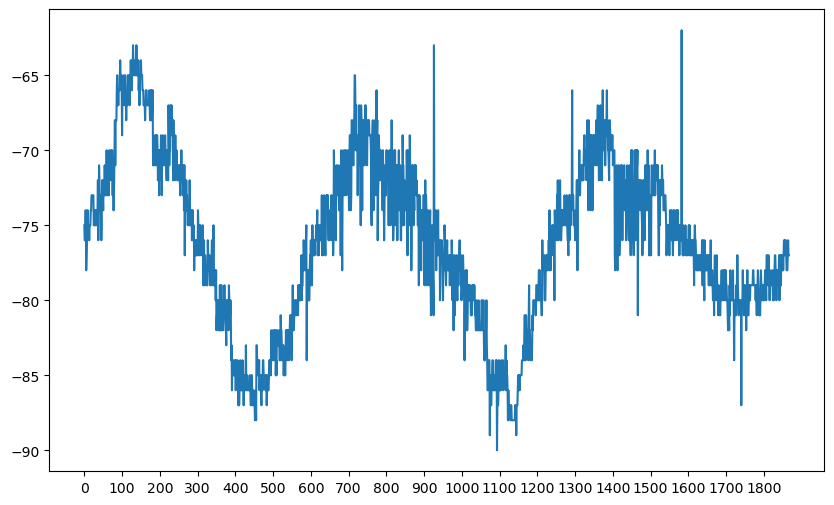

In [105]:
# 5. How many terrestrial (earth) days are there in a Martian year?

plt.figure(figsize=(10,6))
df['min_temp'].plot(x='month',y='min_temp')
plt.xticks(np.arange(0, len(df), 100))
plt.show()

In [106]:
#according to the graph the amount of terrestrial (earth) days that are there in a Martian year is about 600 days

In [107]:
# Write the data to a CSV

df.to_csv('mars_table.csv',index=False)

In [7]:
browser.quit()